In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import array as array

In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [4]:
nbrs = NearestNeighbors(n_neighbors = 2, algorithm = 'ball_tree').fit(X)

In [5]:
distances, indices = nbrs.kneighbors(X)

In [6]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [7]:
distances

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356]])

In [8]:
nbrs.kneighbors_graph(X).toarray()

array([[ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.]])

In [9]:
# -------------------------------------------------------------------- 
# KDTree

In [10]:
from sklearn.neighbors import KDTree

In [11]:
import numpy as np

In [12]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [13]:
kdt = KDTree(X, leaf_size = 30, metric = 'euclidean')

In [14]:
kdt.query(X, k = 2, return_distance = False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [15]:
# ------------------------------------------------------
# Nearest Neighbors Classification

In [16]:
print(__doc__)

Automatically created module for IPython interactive environment


In [17]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

In [19]:
from matplotlib.colors import ListedColormap

In [20]:
from sklearn import neighbors, datasets

In [21]:
n_neighbors = 15

In [22]:
# import some data to play with

In [23]:
iris = datasets.load_iris()

In [24]:
# we only take the first two features. We could avoid this ugly

In [25]:
# slicing by using a two-dim dataset

In [26]:
X = iris.data[:, :2]

In [27]:
y = iris.target

In [28]:
h = .02 # step size in the mesh (размер шага в сетке)

In [29]:
# Create color maps

In [30]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

In [31]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

[0 0 0 ..., 2 2 2]
[0 0 0 ..., 2 2 2]


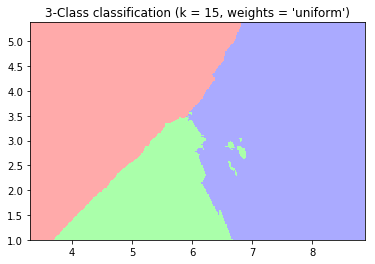

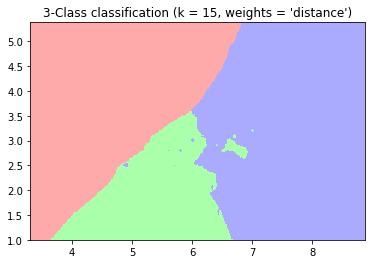

In [37]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data
    # мы создали экземпляр классификатор по соседям и поместили в него данные
    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(X, y)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max]. 
    
    # точка в сетке [x_min, x_max]x[y_min, y_max].
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    print (Z)
#    print (20 * "+")
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
   
  #  print (Z[0])

    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    # Plot also the training points
   # plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold, edgecolor = 'k', s = 20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    
plt.show()